# SentinelHub Playground

example taken from https://github.com/sentinel-hub/sentinelhub-py/blob/master/examples/ogc_request.ipynb

## Setup

In [1]:
INSTANCE_ID = '0e7e4724-e954-4e7c-87ba-708bc8926c79'  # create account and sample layer via https://sentinel-hub.com/

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import logging
logging.basicConfig(level=logging.DEBUG)

In [34]:
import datetime
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
from sentinelhub import WmsRequest, WcsRequest, FisRequest, MimeType, CRS, BBox, CustomUrlParam
from sentinelhub.time_utils import iso_to_datetime
list(CustomUrlParam)

[<CustomUrlParam.SHOWLOGO: 'ShowLogo'>,
 <CustomUrlParam.ATMFILTER: 'AtmFilter'>,
 <CustomUrlParam.EVALSCRIPT: 'EvalScript'>,
 <CustomUrlParam.EVALSCRIPTURL: 'EvalScriptUrl'>,
 <CustomUrlParam.PREVIEW: 'Preview'>,
 <CustomUrlParam.QUALITY: 'Quality'>,
 <CustomUrlParam.UPSAMPLING: 'Upsampling'>,
 <CustomUrlParam.DOWNSAMPLING: 'Downsampling'>,
 <CustomUrlParam.TRANSPARENT: 'Transparent'>,
 <CustomUrlParam.BGCOLOR: 'BgColor'>,
 <CustomUrlParam.GEOMETRY: 'Geometry'>]

In [6]:
def plot_image(image, factor=1):
    """
    Utility function for plotting RGB images.
    """
    fig = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))
    
    if np.issubdtype(image.dtype, np.floating):
        plt.imshow(np.minimum(image * factor, 1))
    else:
        plt.imshow(image)

In [7]:
betsiboka_coords_wgs84 = [46.16, -16.15, 46.51, -15.58]

In [8]:
betsiboka_bbox = BBox(bbox=betsiboka_coords_wgs84, crs=CRS.WGS84)

### WMS (Python)

In [9]:
wms_true_color_request = WmsRequest(layer='TRUE_COLOR',
                                    bbox=betsiboka_bbox,
                                    time=('2017-12-01', '2017-12-31'), # or <explicit date> or 'latest'
                                    width=512, height=856, 
                                    maxcc=0.3, # optional
                                    instance_id=INSTANCE_ID)

DEBUG:sentinelhub.ogc:date_interval=('2017-12-01T00:00:00', '2017-12-31T23:59:59')
DEBUG:sentinelhub.ogc:URL=https://services.sentinel-hub.com/ogc/wfs/0e7e4724-e954-4e7c-87ba-708bc8926c79?SERVICE=wfs&REQUEST=GetFeature&TYPENAMES=S2.TILE&BBOX=-16.15%2C46.16%2C-15.58%2C46.51&OUTPUTFORMAT=application%2Fjson&SRSNAME=EPSG%3A4326&TIME=2017-12-01T00%3A00%3A00%2F2017-12-31T23%3A59%3A59&MAXCC=30.0&MAXFEATURES=100&FEATURE_OFFSET=0
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): services.sentinel-hub.com:443
DEBUG:urllib3.connectionpool:https://services.sentinel-hub.com:443 "GET /ogc/wfs/0e7e4724-e954-4e7c-87ba-708bc8926c79?SERVICE=wfs&REQUEST=GetFeature&TYPENAMES=S2.TILE&BBOX=-16.15%2C46.16%2C-15.58%2C46.51&OUTPUTFORMAT=application%2Fjson&SRSNAME=EPSG%3A4326&TIME=2017-12-01T00%3A00%3A00%2F2017-12-31T23%3A59%3A59&MAXCC=30.0&MAXFEATURES=100&FEATURE_OFFSET=0 HTTP/1.1" 200 1927
DEBUG:sentinelhub.download:Successful download from https://services.sentinel-hub.com/ogc/wfs/0e7e4724-e954

In [10]:
wms_true_color_img = wms_true_color_request.get_data()

DEBUG:sentinelhub.download:Using max_threads=None for 2 requests
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): services.sentinel-hub.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): services.sentinel-hub.com:443
DEBUG:urllib3.connectionpool:https://services.sentinel-hub.com:443 "GET /ogc/wms/0e7e4724-e954-4e7c-87ba-708bc8926c79?SERVICE=wms&MAXCC=30.0&BBOX=-16.15%2C46.16%2C-15.58%2C46.51&FORMAT=image%2Fpng&CRS=EPSG%3A4326&TIME=2017-12-15T07%3A12%3A03%2F2017-12-15T07%3A12%3A03&WIDTH=512&HEIGHT=856&LAYERS=TRUE_COLOR&REQUEST=GetMap&VERSION=1.3.0 HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:https://services.sentinel-hub.com:443 "GET /ogc/wms/0e7e4724-e954-4e7c-87ba-708bc8926c79?SERVICE=wms&MAXCC=30.0&BBOX=-16.15%2C46.16%2C-15.58%2C46.51&FORMAT=image%2Fpng&CRS=EPSG%3A4326&TIME=2017-12-20T07%3A12%3A10%2F2017-12-20T07%3A12%3A10&WIDTH=512&HEIGHT=856&LAYERS=TRUE_COLOR&REQUEST=GetMap&VERSION=1.3.0 HTTP/1.1" 200 None
DEBUG:sentinelhub.download:Successful

In [11]:
print('There are %d Sentinel-2 images available for December 2017 with cloud coverage less ' \
      'than %1.0f%%.' % (len(wms_true_color_img), wms_true_color_request.maxcc * 100.0))

There are 2 Sentinel-2 images available for December 2017 with cloud coverage less than 30%.


DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal bold normal>) = 0.33499999999999996
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
D

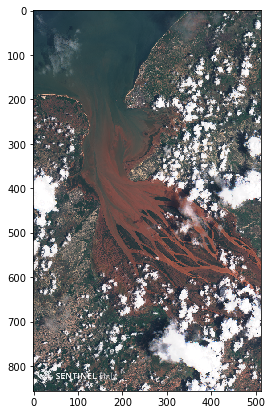

In [12]:
plot_image(wms_true_color_img[-1])

In [13]:
print('These %d images were taken on the following dates:' % len(wms_true_color_img))
for index, date in enumerate(wms_true_color_request.get_dates()):
    print(' - image %d was taken on %s' % (index, date))

DEBUG:sentinelhub.ogc:date_interval=('2017-12-01T00:00:00', '2017-12-31T23:59:59')
DEBUG:sentinelhub.ogc:dates=[datetime.datetime(2017, 12, 15, 7, 12, 3), datetime.datetime(2017, 12, 20, 7, 12, 10)]


These 2 images were taken on the following dates:
 - image 0 was taken on 2017-12-15 07:12:03
 - image 1 was taken on 2017-12-20 07:12:10


In [14]:
wms_bands_request = WmsRequest(layer='BANDS',
                               bbox=betsiboka_bbox, 
                               time='2017-12-15',
                               width=512, height=856,
                               image_format=MimeType.TIFF_d32f,
                               instance_id=INSTANCE_ID)
wms_bands_img = wms_bands_request.get_data()

DEBUG:sentinelhub.ogc:date_interval=('2017-12-15T00:00:00', '2017-12-15T23:59:59')
DEBUG:sentinelhub.ogc:URL=https://services.sentinel-hub.com/ogc/wfs/0e7e4724-e954-4e7c-87ba-708bc8926c79?SERVICE=wfs&REQUEST=GetFeature&TYPENAMES=S2.TILE&BBOX=-16.15%2C46.16%2C-15.58%2C46.51&OUTPUTFORMAT=application%2Fjson&SRSNAME=EPSG%3A4326&TIME=2017-12-15T00%3A00%3A00%2F2017-12-15T23%3A59%3A59&MAXCC=100.0&MAXFEATURES=100&FEATURE_OFFSET=0
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): services.sentinel-hub.com:443
DEBUG:urllib3.connectionpool:https://services.sentinel-hub.com:443 "GET /ogc/wfs/0e7e4724-e954-4e7c-87ba-708bc8926c79?SERVICE=wfs&REQUEST=GetFeature&TYPENAMES=S2.TILE&BBOX=-16.15%2C46.16%2C-15.58%2C46.51&OUTPUTFORMAT=application%2Fjson&SRSNAME=EPSG%3A4326&TIME=2017-12-15T00%3A00%3A00%2F2017-12-15T23%3A59%3A59&MAXCC=100.0&MAXFEATURES=100&FEATURE_OFFSET=0 HTTP/1.1" 200 1000
DEBUG:sentinelhub.download:Successful download from https://services.sentinel-hub.com/ogc/wfs/0e7e4724-e9

In [15]:
wms_bands_img[-1][:, :, 12].shape

(856, 512)

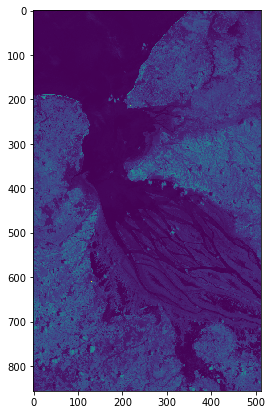

In [16]:
plot_image(wms_bands_img[-1][:, :, 12])

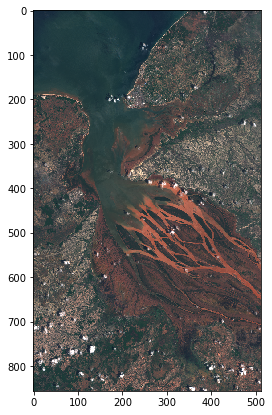

In [17]:
plot_image(wms_bands_img[-1][:, :, [3, 2, 1]], 2.5)

DEBUG:sentinelhub.ogc:date_interval=('2017-12-20T00:00:00', '2017-12-20T23:59:59')
DEBUG:sentinelhub.ogc:URL=https://services.sentinel-hub.com/ogc/wfs/0e7e4724-e954-4e7c-87ba-708bc8926c79?SERVICE=wfs&REQUEST=GetFeature&TYPENAMES=S2.TILE&BBOX=-16.15%2C46.16%2C-15.58%2C46.51&OUTPUTFORMAT=application%2Fjson&SRSNAME=EPSG%3A4326&TIME=2017-12-20T00%3A00%3A00%2F2017-12-20T23%3A59%3A59&MAXCC=100.0&MAXFEATURES=100&FEATURE_OFFSET=0
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): services.sentinel-hub.com:443
DEBUG:urllib3.connectionpool:https://services.sentinel-hub.com:443 "GET /ogc/wfs/0e7e4724-e954-4e7c-87ba-708bc8926c79?SERVICE=wfs&REQUEST=GetFeature&TYPENAMES=S2.TILE&BBOX=-16.15%2C46.16%2C-15.58%2C46.51&OUTPUTFORMAT=application%2Fjson&SRSNAME=EPSG%3A4326&TIME=2017-12-20T00%3A00%3A00%2F2017-12-20T23%3A59%3A59&MAXCC=100.0&MAXFEATURES=100&FEATURE_OFFSET=0 HTTP/1.1" 200 1000
DEBUG:sentinelhub.download:Successful download from https://services.sentinel-hub.com/ogc/wfs/0e7e4724-e9

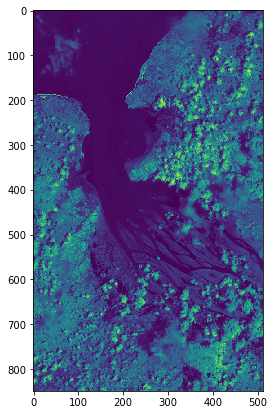

In [19]:
my_evalscript = '''
return [B01,B02,B03,B04,B05,B06,B07,B08,B8A,B09,B10,B11,B12];
'''

evalscript_wms_request = WmsRequest(layer='TRUE_COLOR', # not important which one, just must exist
                                    bbox=betsiboka_bbox, 
                                    time='2017-12-20', 
                                    width=512,
                                    image_format=MimeType.TIFF_d32f,
                                    instance_id=INSTANCE_ID,
                                    custom_url_params={CustomUrlParam.EVALSCRIPT: my_evalscript})

evalscript_wms_data = evalscript_wms_request.get_data()
plot_image(evalscript_wms_data[-1][:, :, 12])

### WCS (Python)

In [20]:
wcs_true_color_request = WcsRequest(layer='TRUE_COLOR',
                                    bbox=betsiboka_bbox, 
                                    time='2017-12-15', 
                                    resx='60m', resy='60m',
                                    instance_id=INSTANCE_ID)

DEBUG:sentinelhub.ogc:date_interval=('2017-12-15T00:00:00', '2017-12-15T23:59:59')
DEBUG:sentinelhub.ogc:URL=https://services.sentinel-hub.com/ogc/wfs/0e7e4724-e954-4e7c-87ba-708bc8926c79?SERVICE=wfs&REQUEST=GetFeature&TYPENAMES=S2.TILE&BBOX=-16.15%2C46.16%2C-15.58%2C46.51&OUTPUTFORMAT=application%2Fjson&SRSNAME=EPSG%3A4326&TIME=2017-12-15T00%3A00%3A00%2F2017-12-15T23%3A59%3A59&MAXCC=100.0&MAXFEATURES=100&FEATURE_OFFSET=0
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): services.sentinel-hub.com:443
DEBUG:urllib3.connectionpool:https://services.sentinel-hub.com:443 "GET /ogc/wfs/0e7e4724-e954-4e7c-87ba-708bc8926c79?SERVICE=wfs&REQUEST=GetFeature&TYPENAMES=S2.TILE&BBOX=-16.15%2C46.16%2C-15.58%2C46.51&OUTPUTFORMAT=application%2Fjson&SRSNAME=EPSG%3A4326&TIME=2017-12-15T00%3A00%3A00%2F2017-12-15T23%3A59%3A59&MAXCC=100.0&MAXFEATURES=100&FEATURE_OFFSET=0 HTTP/1.1" 200 1000
DEBUG:sentinelhub.download:Successful download from https://services.sentinel-hub.com/ogc/wfs/0e7e4724-e9

In [21]:
wcs_true_color_img = wcs_true_color_request.get_data()

DEBUG:sentinelhub.download:Using max_threads=None for 1 requests
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): services.sentinel-hub.com:443
DEBUG:urllib3.connectionpool:https://services.sentinel-hub.com:443 "GET /ogc/wcs/0e7e4724-e954-4e7c-87ba-708bc8926c79?SERVICE=wcs&MAXCC=100.0&BBOX=-16.15%2C46.16%2C-15.58%2C46.51&FORMAT=image%2Fpng&CRS=EPSG%3A4326&TIME=2017-12-15T07%3A12%3A03%2F2017-12-15T07%3A12%3A03&RESX=60m&RESY=60m&COVERAGE=TRUE_COLOR&REQUEST=GetCoverage&VERSION=1.1.2 HTTP/1.1" 200 None
DEBUG:sentinelhub.download:Successful download from https://services.sentinel-hub.com/ogc/wcs/0e7e4724-e954-4e7c-87ba-708bc8926c79?SERVICE=wcs&MAXCC=100.0&BBOX=-16.15%2C46.16%2C-15.58%2C46.51&FORMAT=image%2Fpng&CRS=EPSG%3A4326&TIME=2017-12-15T07%3A12%3A03%2F2017-12-15T07%3A12%3A03&RESX=60m&RESY=60m&COVERAGE=TRUE_COLOR&REQUEST=GetCoverage&VERSION=1.1.2
DEBUG:sentinelhub.download:data_type=MimeType.PNG
DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM

In [22]:
print('Single element in the list is of type = {} and has shape {}'.format(type(wcs_true_color_img[-1]),
                                                                           wcs_true_color_img[-1].shape))

Single element in the list is of type = <class 'numpy.ndarray'> and has shape (1057, 624, 3)


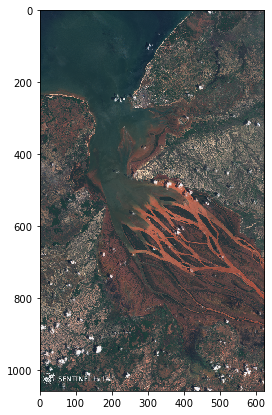

In [23]:
plot_image(wcs_true_color_img[-1])

### WMS (Http)

In [24]:
wfs_params = {'SERVICE':'wfs','REQUEST':'GetFeature','TYPENAMES':'S2.TILE','BBOX':'-16.15,46.16,-15.58,46.51','OUTPUTFORMAT':'application/json','SRSNAME':'EPSG:4326','TIME':'2017-12-01/2017-12-31','MAXCC':'30.0','MAXFEATURES':'100','FEATURE_OFFSET':'0'}
wfs = requests.get("https://services.sentinel-hub.com/ogc/wfs/0e7e4724-e954-4e7c-87ba-708bc8926c79?", params=wfs_params)
wfs.url


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): services.sentinel-hub.com:443
DEBUG:urllib3.connectionpool:https://services.sentinel-hub.com:443 "GET /ogc/wfs/0e7e4724-e954-4e7c-87ba-708bc8926c79?SERVICE=wfs&REQUEST=GetFeature&TYPENAMES=S2.TILE&BBOX=-16.15%2C46.16%2C-15.58%2C46.51&OUTPUTFORMAT=application%2Fjson&SRSNAME=EPSG%3A4326&TIME=2017-12-01%2F2017-12-31&MAXCC=30.0&MAXFEATURES=100&FEATURE_OFFSET=0 HTTP/1.1" 200 1927


'https://services.sentinel-hub.com/ogc/wfs/0e7e4724-e954-4e7c-87ba-708bc8926c79?SERVICE=wfs&REQUEST=GetFeature&TYPENAMES=S2.TILE&BBOX=-16.15%2C46.16%2C-15.58%2C46.51&OUTPUTFORMAT=application%2Fjson&SRSNAME=EPSG%3A4326&TIME=2017-12-01%2F2017-12-31&MAXCC=30.0&MAXFEATURES=100&FEATURE_OFFSET=0'

In [25]:
wfs.json()

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'MultiPolygon',
    'crs': {'type': 'name',
     'properties': {'name': 'urn:ogc:def:crs:EPSG::4326'}},
    'coordinates': [[[[45.93178396701427, -15.374656928849852],
       [46.95453856838988, -15.368029754563597],
       [46.96412360581364, -16.360077552492225],
       [45.93635618696065, -16.3671551019236],
       [45.93178396701427, -15.374656928849852]]]]},
   'properties': {'id': 'S2A_OPER_MSI_L1C_TL_SGS__20171220T103250_A013030_T38LPH_N02.06',
    'date': '2017-12-20',
    'time': '07:12:10',
    'path': 's3://sentinel-s2-l1c/tiles/38/L/PH/2017/12/20/0',
    'crs': 'EPSG:32738',
    'mbr': '600000,8190220 709800,8300020',
    'cloudCoverPercentage': 23.52}},
  {'type': 'Feature',
   'geometry': {'type': 'MultiPolygon',
    'crs': {'type': 'name',
     'properties': {'name': 'urn:ogc:def:crs:EPSG::4326'}},
    'coordinates': [[[[45.93178396701427, -15.374656928849852],
       [46.954538568389

In [26]:
wms_params = {'SERVICE':'wms','MAXCC':'30.0','BBOX':'-16.15,46.16,-15.58,46.51','FORMAT':'image/png','CRS':'EPSG:4326','TIME':'2017-12-15T07:12:03/2017-12-15T07:12:03','WIDTH':'512','HEIGHT':'856','LAYERS':'TRUE_COLOR','REQUEST':'GetMap','VERSION':'1.3.0'}
wms = requests.get("https://services.sentinel-hub.com/ogc/wms/0e7e4724-e954-4e7c-87ba-708bc8926c79?", params=wms_params)
wms.url


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): services.sentinel-hub.com:443
DEBUG:urllib3.connectionpool:https://services.sentinel-hub.com:443 "GET /ogc/wms/0e7e4724-e954-4e7c-87ba-708bc8926c79?SERVICE=wms&MAXCC=30.0&BBOX=-16.15%2C46.16%2C-15.58%2C46.51&FORMAT=image%2Fpng&CRS=EPSG%3A4326&TIME=2017-12-15T07%3A12%3A03%2F2017-12-15T07%3A12%3A03&WIDTH=512&HEIGHT=856&LAYERS=TRUE_COLOR&REQUEST=GetMap&VERSION=1.3.0 HTTP/1.1" 200 None


'https://services.sentinel-hub.com/ogc/wms/0e7e4724-e954-4e7c-87ba-708bc8926c79?SERVICE=wms&MAXCC=30.0&BBOX=-16.15%2C46.16%2C-15.58%2C46.51&FORMAT=image%2Fpng&CRS=EPSG%3A4326&TIME=2017-12-15T07%3A12%3A03%2F2017-12-15T07%3A12%3A03&WIDTH=512&HEIGHT=856&LAYERS=TRUE_COLOR&REQUEST=GetMap&VERSION=1.3.0'

In [27]:
wms.raw

### FIS (Python)

In [ ]:
fis_request = FisRequest(layer='NDVI_INDEX',
                         geometry_list=[betsiboka_bbox],
                         time=('2017-12-01', '2017-12-31'),
                         resolution='60m',
                         instance_id=INSTANCE_ID)

In [ ]:
fis_data = fis_request.get_data()

fis_data[0]['C0'][0]

In [ ]:
def fis_data_to_dataframe(fis_data):
    """ Creates a DataFrame from list of FIS responses
    """
    COLUMNS = ['channel', 'date', 'min', 'max', 'mean', 'stDev']
    data = []
    
    for fis_response in fis_data:
        for channel, channel_stats in fis_response.items():
            for stat in channel_stats:
                row = [int(channel[1:]), iso_to_datetime(stat['date'])]
                
                for column in COLUMNS[2:]:
                    row.append(stat['basicStats'][column])
                
                data.append(row)
    
    return pd.DataFrame(data, columns=COLUMNS).sort_values(['channel', 'date'])


df = fis_data_to_dataframe(fis_data)

df